# 1.1

In [1]:
import pandas as pd
import numpy as np
from math import sqrt
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
data=[[19.3, 19.5], [30.4, 23.7], [22.5, 24.1], [37.4, 25.1], [19.7, 26.2],[15.7, 30.3], [32.8, 24.0], [29.5, 19.5],[33.0,23.0],[17.2,24.6]]
k=2
M= [[19.0, 26.0], [33.0, 29.0]]
e=0.01

In [2]:
def argmin(xj,u):
    vec=[]
    vec.append(xj[0]-u[0])
    vec.append(xj[1]-u[1])    
    temp=vec[0]*vec[0]+vec[1]*vec[1]
    lenVec=sqrt(temp)    
    return(lenVec*lenVec)

In [3]:
def MyKMeans(D,k,e,M):
    t=0
    U=[]
    U.append(M)    
    while True:
        t+=1
        C=[]       
        for i in range(k):
            C.append([])
        for xj in range(len(D)):
            argminVal=32000
            index=0
            for i in range(k):
                tempMin=argmin(D[xj],U[t-1][i])                
                if tempMin<=argminVal:
                    argminVal=tempMin
                    index=i                    
            C[index].append(xj)            
        tempU=[]
        for i in range(k):
            tempU.append([])
            sumX=0
            sumY=0
            for j in range(len(C[i])):
                sumX+=D[C[i][j]][0]
                sumY+=D[C[i][j]][1]
            vec=[]
            vec.append(sumX/len(C[i]))
            vec.append(sumY/len(C[i]))
            tempU[i]=vec
        U.append(tempU)        
        conditionU=0
        for i in range(1,k):
            conditionU+=argmin(U[t][i],U[t-1][i])
        if conditionU<e:
            print('Clusters: ',C)
            print('New centres: ',U[t])
            return(C,U[t])

In [4]:
print('Source data D = ',data)
print('Clusters count: ',k)
print('Init centers: u_init = ',M)
print('Epsilon: ',e)
print()
print('1.1')
C,centroids=MyKMeans(data,k,e,M)

Source data D =  [[19.3, 19.5], [30.4, 23.7], [22.5, 24.1], [37.4, 25.1], [19.7, 26.2], [15.7, 30.3], [32.8, 24.0], [29.5, 19.5], [33.0, 23.0], [17.2, 24.6]]
Clusters count:  2
Init centers: u_init =  [[19.0, 26.0], [33.0, 29.0]]
Epsilon:  0.01

1.1
Clusters:  [[0, 2, 4, 5, 9], [1, 3, 6, 7, 8]]
New centres:  [[18.880000000000003, 24.939999999999998], [32.62, 23.06]]


# 1.2

In [5]:
def drawDiagram(data,C,centroids):
    C0X=[]
    C0Y=[]
    C1X=[]
    C1Y=[]
    for i in range(len(C[0])):
        C0X.append(data[C[0][i]][0])
        C0Y.append(data[C[0][i]][1])
    for i in range(len(C[1])):
        C1X.append(data[C[1][i]][0])
        C1Y.append(data[C[1][i]][1])    
    plt.scatter(C0X,C0Y,c='blue', label='Cluster 0')
    plt.scatter(C1X,C1Y,c='orange', label='Cluster 1')
    plt.scatter(centroids[0][0], centroids[0][1], marker='*',c='g')
    plt.scatter(centroids[1][0], centroids[1][1], marker='*',c='r')
    plt.legend()
    for i in range(len(data)):
        for j in range(len(C0X)):
            if data[i][0]==C0X[j] and data[i][1]==C0Y[j]:
                plt.annotate(i, (data[i][0]-0.1, data[i][1]+0.1))
        for j in range(len(C1X)):
            if data[i][0]==C1X[j] and data[i][1]==C1Y[j]:
                plt.annotate(i, (data[i][0]-0.1, data[i][1]+0.1))
    plt.annotate('Center 0',(centroids[0][0], centroids[0][1]-0.2))
    plt.annotate('Center 1',(centroids[1][0], centroids[1][1]-0.2))

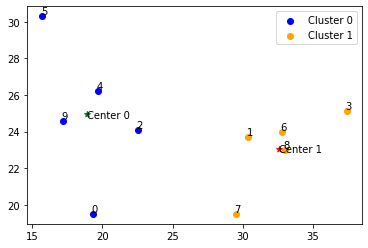

In [6]:
drawDiagram(data,C,centroids)

# 1.3

In [7]:
kmeans = KMeans(n_clusters=2, tol=e).fit(data)
Klabels=list(kmeans.labels_)
Kcentres=(kmeans.cluster_centers_)
print('KMean labels: ',Klabels)
print('KMean cluster centres: ',Kcentres)

KMean labels:  [0, 1, 0, 1, 0, 0, 1, 1, 1, 0]
KMean cluster centres:  [[18.88 24.94]
 [32.62 23.06]]


# 1.4

Add point [-10.0, 25.0] to D
Clusters:  [[0, 2, 4, 5, 9, 10], [1, 3, 6, 7, 8]]
New centres:  [[14.066666666666668, 24.95], [32.62, 23.06]]


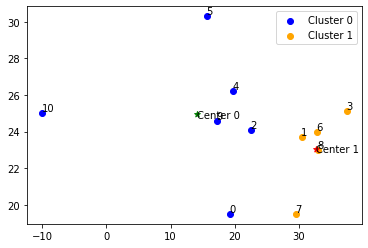

In [8]:
data2=data.copy()
data2.append([-10.0,25.0])
print('Add point [-10.0, 25.0] to D')
C2,centroids2=MyKMeans(data2,k,e,M)
drawDiagram(data2,C2,centroids2)